In [54]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers
import cPickle as pickle

# Load posteriors

In [55]:
trace = pickle.load(open('Ex-4_0.3_A_D_trace.p', 'rb'))
subj_data = pickle.load(open('Ex-4_0.3_A_D_idx.p', 'rb'))

# Check funnel plot

(10000, 315)
0

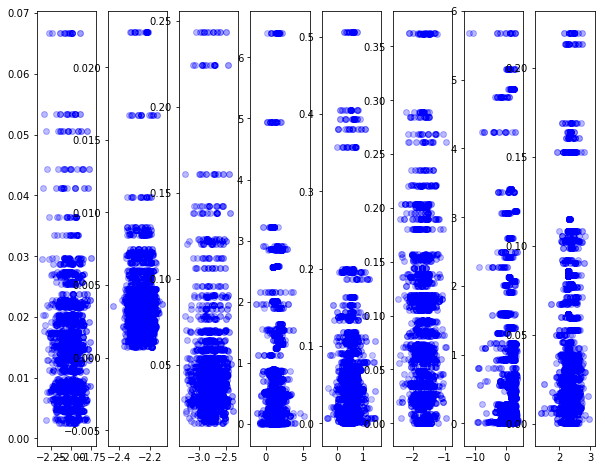

 36
36


"\nfor group in np.arange(trace['mu'].shape[1]):\n    print '--- Group %d ---' %(group)\n    chol_name = 'chol_cov%d' %(group)\n    fig, axes = plt.subplots(1, 8, figsize = (10, 8))\n\n    for var in np.arange(8):\n        for i, means in enumerate(trace['mu']):\n            groupmean = means[group, var]\n            chol = trace[chol_name][i]\n            cov = helpers.cov_from_chol(8, chol)\n            groupvar = cov[var, var] # diagonal element is sd\n\n            if trace['diverging'][i]:\n                axes[var].scatter(groupmean, groupvar, c='r')\n\n            else:\n                axes[var].scatter(groupmean, groupvar, c='b')\n        \n    plt.show()\n"

In [59]:

fig, axes = plt.subplots(1, 8, figsize=(10,8))

chols = trace['chol_cov']

print trace['theta1'].shape
for i in np.arange(len(chols)/100):
    if i%100 == 0:
        print i,
        
    chol = chols[i*100]
    cov = helpers.cov_from_chol(8, chol)
    
    for var in np.arange(8):
        groupvar = cov[var, var]
        
        if trace['diverging'][i]:
            theta_name = 'theta%d' %(var+1)
            x = trace[theta_name][i]
            y = groupvar*np.ones(x.shape[0])
            axes[var].scatter(x,y, c='r', alpha=0.01)
            
        else:
            theta_name = 'theta%d' %(var+1)
            x = trace[theta_name][i]
            y = groupvar*np.ones(x.shape[0])
            axes[var].scatter(x,y, c='b', alpha=0.01)
    
plt.show()

print len(chols[0])
print len(np.unique(chols[0]))

"""
for group in np.arange(trace['mu'].shape[1]):
    print '--- Group %d ---' %(group)
    chol_name = 'chol_cov%d' %(group)
    fig, axes = plt.subplots(1, 8, figsize = (10, 8))

    for var in np.arange(8):
        for i, means in enumerate(trace['mu']):
            groupmean = means[group, var]
            chol = trace[chol_name][i]
            cov = helpers.cov_from_chol(8, chol)
            groupvar = cov[var, var] # diagonal element is sd

            if trace['diverging'][i]:
                axes[var].scatter(groupmean, groupvar, c='r')

            else:
                axes[var].scatter(groupmean, groupvar, c='b')
        
    plt.show()
"""

In [57]:
a = np.arange(100)
print a[::10]

[ 0 10 20 30 40 50 60 70 80 90]


In [58]:
## Index mask
rat_idx = np.unique(trace['theta1'][0,:], return_index=True)[1]
rat_idx = sorted(rat_idx)

## Get group membership for each individual
counter = 0
group_dict = {}
for subj in subj_data:
    group_name = subj[0].split('/')[1]
    if group_name in group_dict.keys():
        continue
        
    else:
        group_dict[group_name] = counter
        counter += 1
        
group_ids = []
for subj in subj_data:
    group_name = subj[0].split('/')[1]
    group_ids.append(group_dict[group_name])
    
## Get posterior for individuals
full_post = helpers.get_dataset(trace, rat_idx)

## Get colour table for diverging/non-diverging samples
c = []
for isdiv in trace['diverging']:
    if isdiv:
        c.append('r')
    
    else:
        c.append('b')


## Iterate over individuals, getting cov matrix for each
for i in np.arange(len(rat_idx[:10])):
    fig, axes = plt.subplots(1,8)
    rat_post = full_post[:,:,i]
    rat_group = group_ids[i]
    chol_name = 'chol_cov'
    
    for var in np.arange(8):
        for j in np.arange(rat_post[var,:].shape[0]):
            chol = trace[chol_name][j]        
            cov = helpers.cov_from_chol(8, chol)
            group_var = cov[var, var] # diagonal element is sd
            rat_var = rat_post[var, j]
            
            if trace['diverging'][j]:
                axes[var].scatter(rat_var, group_var, c='r')
                
            else:
                axes[var].scatter(rat_var, group_var, c='b')
            
    plt.show()

IndexError: invalid index to scalar variable.